In [535]:
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from scipy.stats import skew, stats, pearsonr, spearmanr
import seaborn as sns


Convert all columns so that they use metric (International System of Units, SI) orderived units: temp and dewp to Celsius, precip to millimetres, visib to metres, as well as wind_speed and wind_gust to metres per second. Replace the data in-place (overwrite existing columns with new ones).

In [536]:

#*Load the gzipped CSV file
df = pd.read_csv('weather.csv', skiprows = 42)
print(df.head())



#* Convert temp and dewp to Celsius
df['temp'] = (df['temp'] - 32) * 5/9
df['dewp'] = (df['dewp'] - 32) * 5/9

#* Convert precip to mm
df['precip'] = df['precip'] * 25.4

#* Convert visib to m
df['visib'] = df['visib'] * 1609.34

#* Convert wind-speed and wind-gust to m/s
df['wind_speed'] = df['wind_speed'] * 0.44704
df['wind_gust'] = df['wind_gust'] * 0.44704

print("===============================================")
print(df.head())


  origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0  37.04  21.92  53.97     230.0    10.35702   
1    EWR  2013      1    1     1  37.04  21.92  53.97     230.0    13.80936   
2    EWR  2013      1    1     2  37.94  21.92  52.09     230.0    12.65858   
3    EWR  2013      1    1     3  37.94  23.00  54.51     230.0    13.80936   
4    EWR  2013      1    1     4  37.94  24.08  57.04     240.0    14.96014   

   wind_gust  precip  pressure  visib            time_hour  
0  11.918651     0.0    1013.9   10.0  2013-01-01 01:00:00  
1  15.891535     0.0    1013.0   10.0  2013-01-01 02:00:00  
2  14.567241     0.0    1012.6   10.0  2013-01-01 03:00:00  
3  15.891535     0.0    1012.7   10.0  2013-01-01 04:00:00  
4  17.215830     0.0    1012.8   10.0  2013-01-01 05:00:00  
  origin  year  month  day  hour  temp  dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0   2.8  -5.6  53.97     230.0    4.630002   
1    

Compute daily mean wind speeds for the LGA airport (~365 total speed values, for each day separately; you can, for example, group the data by year, month, and day at the same time)

In [537]:
lga_data = df[df['origin'] == 'LGA']
# print(lga_data.head())

#* group by year, month, day and calculate the daily mean temperature
daily_mean_wind_speeds_lga = lga_data.groupby(['year', 'month', 'day']).agg({'wind_speed': 'mean'}).reset_index()

#* rename the wind_speed column to daily_mean_wind_speed
daily_mean_wind_speeds_lga.rename(columns={'wind_speed': 'daily_mean_wind_speed'}, inplace=True)
print(daily_mean_wind_speeds_lga.head())


   year  month  day  daily_mean_wind_speed
0  2013      1    1               6.687781
1  2013      1    2               6.430559
2  2013      1    3               4.908660
3  2013      1    4               6.880698
4  2013      1    5               5.144447


Present the daily mean wind speeds at LGA (~365 aforementioned data points) in a single plot,e.g.,
using the matplotlib.pyplot.plot function. The x-axis labels should be human-readable and intuitive (e.g., month names or dates).

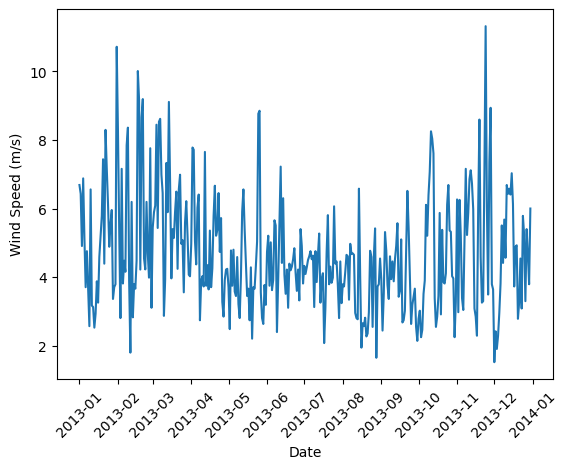

In [538]:

daily_mean_wind_speeds_lga['date'] = pd.to_datetime(daily_mean_wind_speeds_lga[['year', 'month', 'day']])

# Plotting
fig, ax = plt.subplots()
ax.plot(daily_mean_wind_speeds_lga['date'], daily_mean_wind_speeds_lga['daily_mean_wind_speed'])
ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed (m/s)')

# Set date format on x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate date labels for better readability
plt.xticks(rotation=45)
plt.show()


Identify the ten windiest days at LGA (dates and the corresponding mean daily wind speeds)

In [539]:

top_10_windiest_days = round(daily_mean_wind_speeds_lga.nlargest(10, 'daily_mean_wind_speed'), 2)
print(top_10_windiest_days[['date', 'daily_mean_wind_speed']])


          date  daily_mean_wind_speed
327 2013-11-24                  11.32
30  2013-01-31                  10.72
47  2013-02-17                  10.01
51  2013-02-21                   9.19
48  2013-02-18                   9.17
72  2013-03-14                   9.11
331 2013-11-28                   8.94
145 2013-05-26                   8.85
144 2013-05-25                   8.77
50  2013-02-20                   8.66


Compute the monthly mean wind speeds for all the three airports.
There is one obvious outlier amongst the observed wind speeds. Locate it(programmatically, do not hardcode the date/day/row number) and replace it with np.nan (NaN) before computing the means

In [540]:



q1 = df['wind_speed'].quantile(0.25)
q3 = df['wind_speed'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
# print(lower_bound, upper_bound)

outlier_indices = df[(df['wind_speed'] < lower_bound) | (df['wind_speed'] > upper_bound)]
# print(outlier_indices)

df.loc[df['wind_speed'] < lower_bound, 'wind_speed'] = np.nan
df.loc[df['wind_speed'] > upper_bound, 'wind_speed'] = np.nan

df[df['wind_speed'].isnull()]


,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
473,EWR,2013,1,20,18,12.2,-7.2,25.12,260.0,NaN,13.024279,0.000,1006.0,16093.40,2013-01-20 19:00:00
474,EWR,2013,1,20,19,11.7,-10.0,20.87,250.0,NaN,13.616291,0.000,1006.9,16093.40,2013-01-20 20:00:00
520,EWR,2013,1,22,17,-5.0,-21.7,25.71,270.0,NaN,13.024279,0.000,1016.8,16093.40,2013-01-22 18:00:00
569,EWR,2013,1,24,18,-4.4,-21.7,24.57,330.0,NaN,14.800317,0.000,1024.0,16093.40,2013-01-24 19:00:00
570,EWR,2013,1,24,19,-4.4,-21.1,25.89,320.0,NaN,13.024279,0.000,1024.9,16093.40,2013-01-24 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25343,LGA,2013,11,28,5,1.1,-8.3,49.51,290.0,NaN,14.208304,0.000,1008.3,16093.40,2013-11-28 06:00:00
25344,LGA,2013,11,28,6,1.1,-8.9,47.25,290.0,NaN,13.024279,0.000,1009.8,16093.40,2013-11-28 07:00:00
25347,LGA,2013,11,28,9,0.0,-10.0,46.92,300.0,NaN,13.024279,0.000,1015.6,16093.40,2013-11-28 10:00:00
25748,LGA,2013,12,15,2,-3.0,-4.0,92.80,60.0,NaN,14.800317,0.000,NaN,804.67,2013-12-15 03:00:00


In [541]:
monthly_data = df.groupby(['origin', 'year', 'month']).agg({'wind_speed': 'mean'}).reset_index()
print(monthly_data)

   origin  year  month  wind_speed
0     EWR  2013      1    4.102076
1     EWR  2013      2    4.530279
2     EWR  2013      3    5.010183
3     EWR  2013      4    4.255796
4     EWR  2013      5    3.617888
5     EWR  2013      6    4.167217
6     EWR  2013      7    4.022527
7     EWR  2013      8    3.349452
8     EWR  2013      9    3.574639
9     EWR  2013     10    3.640309
10    EWR  2013     11    4.480718
11    EWR  2013     12    3.911640
12    JFK  2013      1    5.060265
13    JFK  2013      2    5.476453
14    JFK  2013      3    5.935677
15    JFK  2013      4    5.311958
16    JFK  2013      5    4.392293
17    JFK  2013      6    4.866446
18    JFK  2013      7    4.489068
19    JFK  2013      8    4.295648
20    JFK  2013      9    4.350242
21    JFK  2013     10    4.573231
22    JFK  2013     11    5.397103
23    JFK  2013     12    4.842085
24    LGA  2013      1    4.869840
25    LGA  2013      2    5.172713
26    LGA  2013      3    5.672411
27    LGA  2013     

Draw the monthly mean wind speeds for the three airports on the same plot (three curves of different colours). Add a readable legend

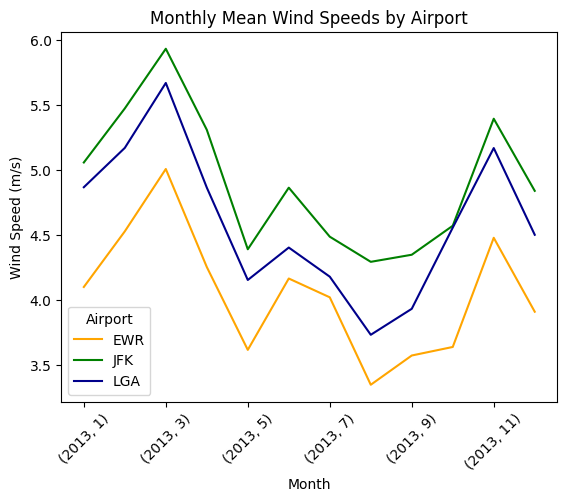

In [542]:
# Pivot the data for plotting
pivot_data = monthly_data.pivot_table(index=['year', 'month'], columns='origin', values='wind_speed')

# Plotting
fig, ax = plt.subplots()
colors = ['orange', 'green', 'darkblue']  # Colors for LGA, JFK, EWR respectively
pivot_data.plot(ax=ax, color=colors)  # Specifying colors for each line
ax.set_title('Monthly Mean Wind Speeds by Airport')
ax.set_xlabel('Month')
ax.set_ylabel('Wind Speed (m/s)')
plt.legend(title='Airport')
plt.xticks(rotation=45)
plt.show()
